# Assignment-3
Due date Oct. 10

In this assignment, you are asked to calculate sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. To accomplish this task:

* Annualized the daily return and standard deviation for each respective stock.
* Draw efficient frontier.
* Assume risk free rate to be 0.01.
* Calculate the sharpe ratio and interpret which one is the best.

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

In [1]:
#Stocks:
#Apple, Amazon, 3M, Exxon

#Period:
#Jan 2021 to Jan 2022

#Assumption:
#Risk free rate is .01

#------------------------------------------------------------------

#First use pip to install packages
!pip3 install yfinance
!pip3 install PyPortfolioOpt

#Import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#Set up

stocks = ['AAPL', 'AMZN', 'MMM', 'XOM'] 
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 1, 1)
stock_data = yf.download(stocks, start=start, end=end, interval='1d')['Close']

[*********************100%***********************]  4 of 4 completed


In [3]:
#Show df

stock_data.head()

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-04 00:00:00-05:00,129.410004,159.331497,171.869995,41.500000
2021-01-05 00:00:00-05:00,131.009995,160.925507,171.580002,43.500000
2021-01-06 00:00:00-05:00,126.599998,156.919006,174.190002,44.610001
2021-01-07 00:00:00-05:00,130.919998,158.108002,169.720001,44.959999
2021-01-08 00:00:00-05:00,132.050003,159.134995,166.619995,45.459999


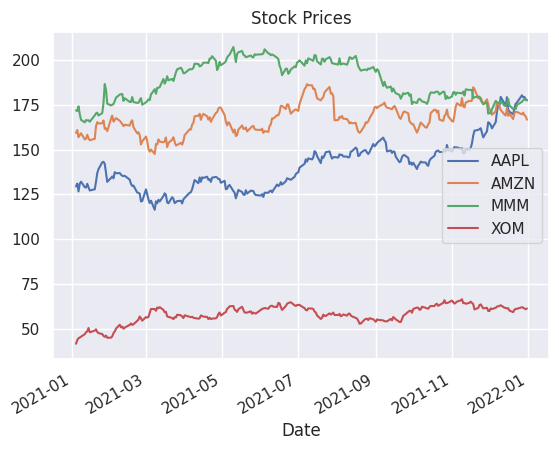

In [4]:
#EDA

stock_data.plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

In [5]:
#Statistics for each stock

returns = np.log(stock_data/stock_data.shift(1))
returns.dropna(inplace=True)
returns.describe()

,AAPL,AMZN,MMM,XOM
count,251.000000,251.000000,251.000000,251.000000
mean,0.001260,0.000181,0.000131,0.001547
std,0.015753,0.015184,0.011798,0.018763
min,-0.042567,-0.078663,-0.046380,-0.049297
25%,-0.007546,-0.008578,-0.005752,-0.011207
50%,0.001473,0.001083,0.000327,0.001782
75%,0.012378,0.009847,0.007293,0.013288
max,0.052451,0.045859,0.059035,0.047068


In [6]:
#Show returns

returns.head()

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-05 00:00:00-05:00,0.012288,0.009955,-0.001689,0.047068
2021-01-06 00:00:00-05:00,-0.034241,-0.025212,0.015097,0.025197
2021-01-07 00:00:00-05:00,0.033554,0.007549,-0.025997,0.007815
2021-01-08 00:00:00-05:00,0.008594,0.006475,-0.018434,0.011060
2021-01-11 00:00:00-05:00,-0.023523,-0.021754,-0.008559,0.029905


In [7]:
returns.mean() * 252 #number of business days in a year

AAPL    0.317640
AMZN    0.045491
MMM     0.033096
XOM     0.389837
dtype: float64

In [8]:
cov_matrix = returns.cov() * np.sqrt(252)
cov_matrix

,AAPL,AMZN,MMM,XOM
AAPL,0.003940,0.002238,0.000377,0.000285
AMZN,0.002238,0.003660,-0.000096,0.000326
MMM,0.000377,-0.000096,0.002210,0.000966
XOM,0.000285,0.000326,0.000966,0.005589


In [9]:
def get_opt(weights):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * np.sqrt(252), weights)))
    sharpe = ret / vol
    return np.array([ret, vol, sharpe])

In [10]:
from scipy.optimize import minimize

def neg_sharpe(weights):
    return get_opt(weights)[2] * -1

def const_sum(weights):
    return np.sum(weights)-1

cons = ({'type':'eq', 'fun':const_sum})

bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

init_guess = [.25,.25,.25,.25]

opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints= cons)


In [11]:
opt_results

     fun: -7.056017625680274
     jac: array([ 4.76419926e-04,  2.92924702e+00,  1.18941897e+00, -5.48481941e-04])
 message: 'Optimization terminated successfully'
    nfev: 31
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([5.35227193e-01, 1.10149520e-15, 0.00000000e+00, 4.64772807e-01])

In [12]:
#These are the weights

my_weights = opt_results.x
my_weights

array([5.35227193e-01, 1.10149520e-15, 0.00000000e+00, 4.64772807e-01])

In [13]:
get_opt(my_weights)

array([0.3511952 , 0.04977244, 7.05601763])

#### The optimal Sharpe Ratio is 7.06.

In [14]:
# Using PyPortfolioOpt

import pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

In [15]:
mu = mean_historical_return(stock_data)
S = CovarianceShrinkage(stock_data).ledoit_wolf()

In [16]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [17]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('AAPL', 0.51554), ('AMZN', 0.0), ('MMM', 0.0), ('XOM', 0.48446)])

In [18]:
ef.portfolio_performance(verbose=True)

Expected annual return: 42.4%
Annual volatility: 19.7%
Sharpe Ratio: 2.05


(0.4237126634748412, 0.19694428913995532, 2.049882559366569)

#### The Sharpe Ratios are different when coding it directly versus using the PyPortfolioOpt package. 
#### Both Sharpe Ratios are positive numbers, which is good.
#### In terms of which one is better, the higher the Sharpe ratio is, the better return the portfolio is getting. 
#### It is hard to say which method is more accurate. I would lean more towards the PyPortfolioOpt package only because it uses historical return data, and can draw the efficient frontier. 

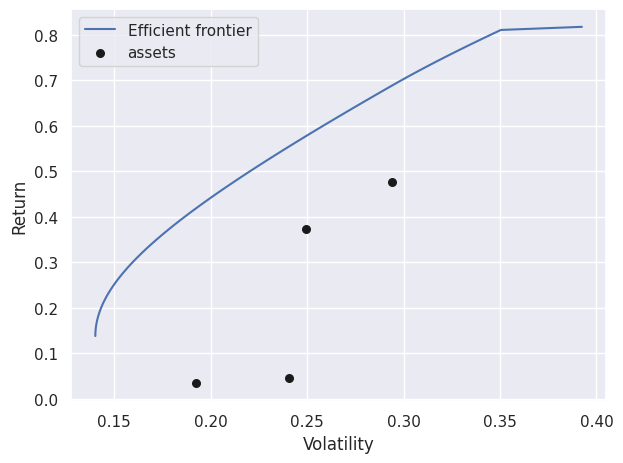

In [19]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
from pypfopt import plotting
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

#### Being on the frontier means optimizing return for each level of risk (volatitlity/standard deviation). None of the assets are on the efficient frontier, which means they offer less return for the same risk.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=310a33be-f512-48c8-8707-dc5137fbcc75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>